In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import LinearRegressionErrors as lrs

Graficos para los tamaños de avalancha (size), columna 2 de los ficheros AdditionData

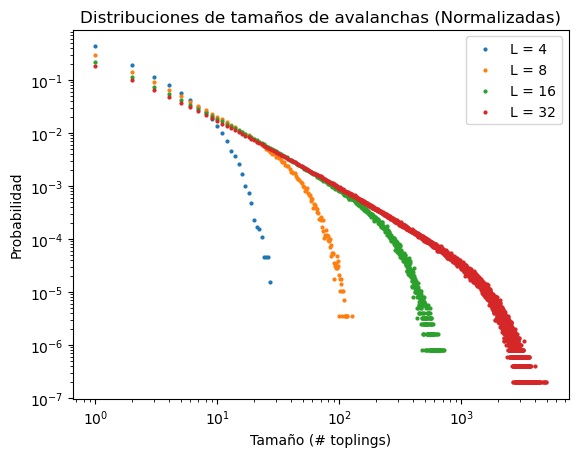

In [35]:
l = [4, 8, 16, 32]
for k in l:
    data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,1],int(np.max(data[:,1])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x, y, s=4, label="L = "+str(k))

plt.yscale("log")
plt.xscale("log")
plt.title("Distribuciones de tamaños de avalanchas (Normalizadas)")
plt.xlabel("Tamaño (# toplings)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

Sacamos la pendiente del modelo mas grande L = 32 (TAMAÑOS)

Pendiente: [-1.36646654] ± [0.00317831]
Ord. origen: -0.7137965191566629 ± [34.02098179]
R^2: 0.9981441522074748


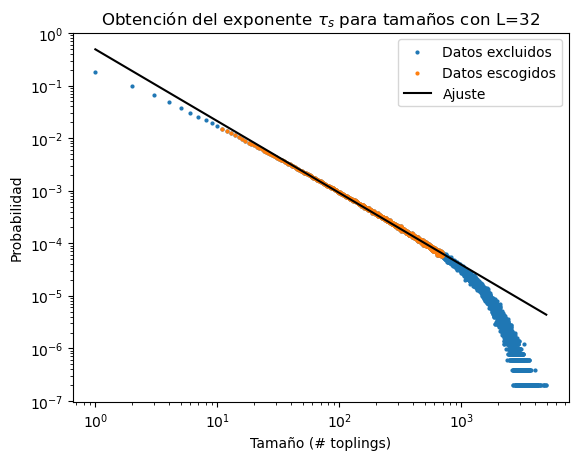

In [48]:
data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_32x32.dat", delimiter=",", dtype=int)
data = data[ data[:,1]>0]
y = np.histogram(data[:,1],int(np.max(data[:,1])), density=True)[0]
x = np.linspace(1, y.size, y.size)
plt.scatter(x, y, s=4, label="Datos excluidos")

linRegData = y[10:700]
linRegX = x[10:700]
plt.scatter(linRegX,linRegData, s=4, label="Datos escogidos")

regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

m = regModel.coef_
n = regModel.intercept_
R2 = regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", m, "±" , lrs.mErr(m, R2, linRegX.size))
print("Ord. origen:", n, "±", lrs.nErr(m, R2, linRegX.size, linRegX))
print("R^2:", R2)

plt.plot(x, np.exp(regModel.intercept_)*x**regModel.coef_,color="black", label="Ajuste")

plt.yscale("log")
plt.xscale("log")
plt.title(r"Obtención del exponente $\tau_s$ para tamaños con L=32")
plt.xlabel("Tamaño (# toplings)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

Calculo del exponente D para los tamaños

Pendiente: [2.31766811] ± [0.14093243]
Ord. origen: 0.15300509501532122 ± [5.19733128]
R^2: 0.9963227872243123


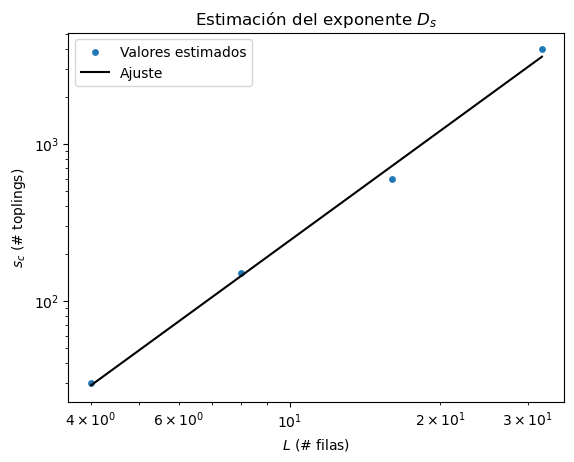

In [3]:
l = [4, 8, 16, 32]
Xc = [30, 150, 600, 4000]

plt.scatter(l, Xc, s=15, label="Valores estimados")

linRegData = np.array(Xc)
linRegX = np.array(l)

regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

m = regModel.coef_
n = regModel.intercept_
R2 = regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", m, "±" , lrs.mErr(m, R2, linRegX.size))
print("Ord. origen:", n, "±", lrs.nErr(m, R2, linRegX.size, linRegX))
print("R^2:", R2)

plt.plot(linRegX, np.exp(regModel.intercept_)*linRegX**regModel.coef_,color="black", label="Ajuste")

plt.yscale("log")
plt.xscale("log")
plt.title("Estimación del exponente $D_s$")
plt.xlabel("$L$ (# filas)")
plt.ylabel("$s_c$ (# toplings)")
plt.legend()
plt.show()

Finite size scaling (FSS) COLAPSO Tamaños

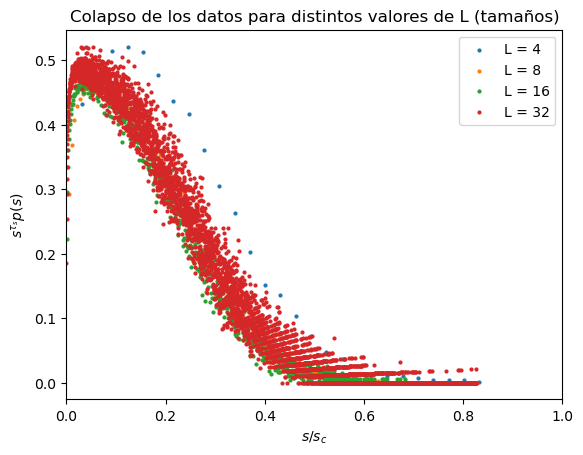

In [55]:
tau = 1.358 #1.366
D = 2.51 #2.32

l = [4, 8, 16, 32]
for k in l:
    data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,1],int(np.max(data[:,1])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x/(k**D), y*x**tau, s=4, label="L = "+str(k))

#plt.yscale("log")
#plt.xscale("log")
plt.title("Colapso de los datos para distintos valores de L (tamaños)")
plt.xlabel(r"$s / s_c$")
plt.ylabel(r"$s^{\tau_s}p(s)$")
plt.legend()
plt.xlim(0,1)
plt.show()

Graficos para las duraciones de avalancha, columna 3 de los ficheros AdditionData

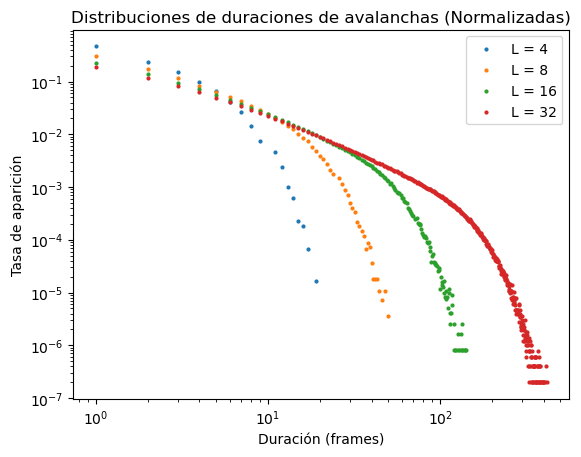

In [16]:
l = [4, 8, 16, 32]
for k in l:
    data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,2],int(np.max(data[:,2])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x, y, s=4, label="L = "+str(k)) #Powerlaw plot

plt.yscale("log")
plt.xscale("log")
plt.title("Distribuciones de duraciones de avalanchas (Normalizadas)")
plt.xlabel("Duración (frames)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

Sacamos la pendiente del modelo mas grande L = 32 (DURACIONES)

Pendiente: [-1.54223512] ± [0.01367212]
Ord. origen: -0.07649500637252427 ± [7.94825587]
R^2: 0.9965598460087419


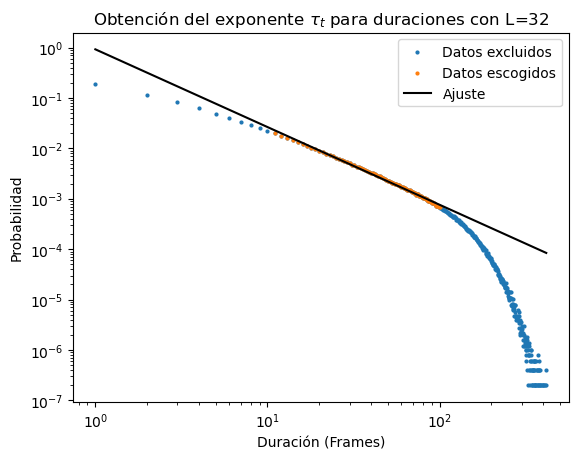

In [49]:
data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_32x32.dat", delimiter=",", dtype=int)
data = data[ data[:,1]>0]
y = np.histogram(data[:,2],int(np.max(data[:,2])), density=True)[0]
x = np.linspace(1, y.size, y.size)
plt.scatter(x, y, s=4, label="Datos excluidos")

linRegData = y[10:100]
linRegX = x[10:100]
plt.scatter(linRegX,linRegData, s=4, label="Datos escogidos")

regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

m = regModel.coef_
n = regModel.intercept_
R2 = regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", m, "±" , lrs.mErr(m, R2, linRegX.size))
print("Ord. origen:", n, "±", lrs.nErr(m, R2, linRegX.size, linRegX))
print("R^2:", R2)

plt.plot(x, np.exp(regModel.intercept_)*x**regModel.coef_,color="black", label="Ajuste")

plt.yscale("log")
plt.xscale("log")
plt.title(r"Obtención del exponente $\tau_t$ para duraciones con L=32")
plt.xlabel("Duración (Frames)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

Calculo del exponente D para las duraciones

Pendiente: [1.42877124] ± [0.05209521]
Ord. origen: 1.056823525857439 ± [1.92117647]
R^2: 0.998673200777492


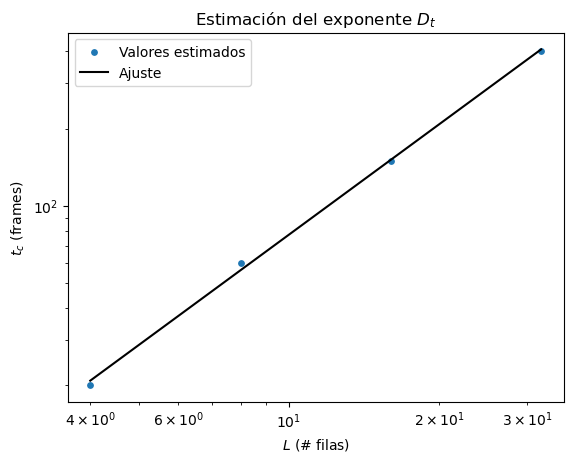

In [5]:
l = [4, 8, 16, 32]
Xc = [20, 60, 150, 400]

plt.scatter(l, Xc, s=15, label="Valores estimados")

linRegData = np.array(Xc)
linRegX = np.array(l)

regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

m = regModel.coef_
n = regModel.intercept_
R2 = regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", m, "±" , lrs.mErr(m, R2, linRegX.size))
print("Ord. origen:", n, "±", lrs.nErr(m, R2, linRegX.size, linRegX))
print("R^2:", R2)

plt.plot(linRegX, np.exp(regModel.intercept_)*linRegX**regModel.coef_,color="black", label="Ajuste")

plt.yscale("log")
plt.xscale("log")
plt.title("Estimación del exponente $D_t$")
plt.xlabel("$L$ (# filas)")
plt.ylabel("$t_c$ (frames)")
plt.legend()
plt.show()

Finite size scaling (FSS) COLAPSO Duraciones

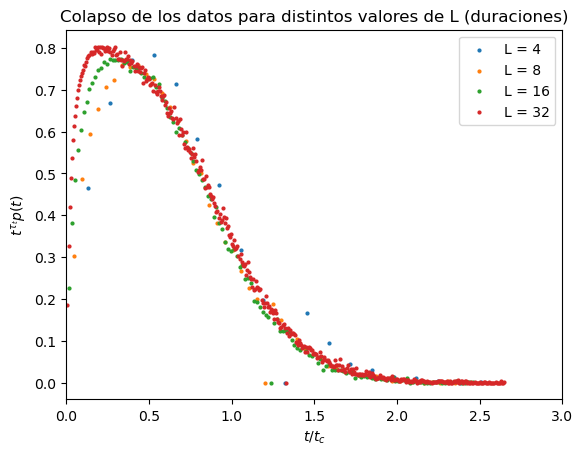

In [52]:
tau = 1.487 #1.542
D = 1.46 #1.43

l = [4, 8, 16, 32]
for k in l:
    data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,2],int(np.max(data[:,2])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x/(k**D), y*x**tau, s=4, label="L = "+str(k))
    

#plt.yscale("log")
#plt.xscale("log")
plt.title("Colapso de los datos para distintos valores de L (duraciones)")
plt.xlabel(r"$t / t_c$")
plt.ylabel(r"$t^{\tau_t}p(t)$")
plt.legend()
plt.xlim(0,3)
plt.show()

Correlación de exponentes scatter, tamaño vs duración

Gamma_st =  1.3603351955307261


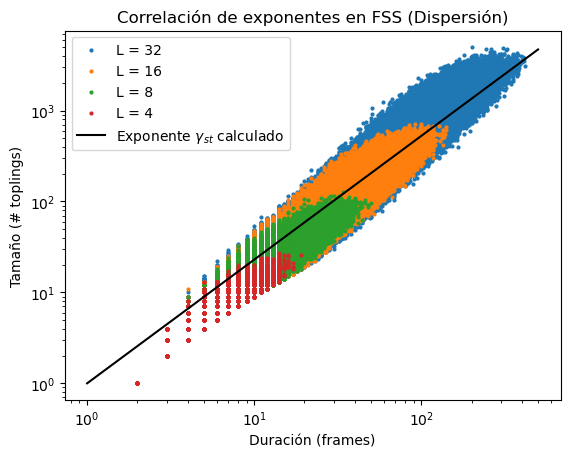

In [56]:
l = [32, 16, 8, 4]

gamma = (1.487-1)/(1.358-1)
print("Gamma_st = ", gamma)

for k in l:
    data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = data[:,1]
    x = data[:,2]
    plt.scatter(x, y, s=4, label="L = "+str(k))

v = np.linspace(1, 500, 500)

plt.plot(v, v**gamma, c="black", label=r"Exponente $\gamma_{st}$ calculado")

plt.xscale("log")
plt.yscale("log")
plt.title("Correlación de exponentes en FSS (Dispersión)")
plt.ylabel("Tamaño (# toplings)")
plt.xlabel("Duración (frames)")

plt.legend()

Correlación de exponentes, tamaño medio vs duración

Pendiente: [1.45912997] ± [0.01236309]
Ord. origen: -0.3362692747075622 ± [53.96268012]
R^2: 0.9866327114439665


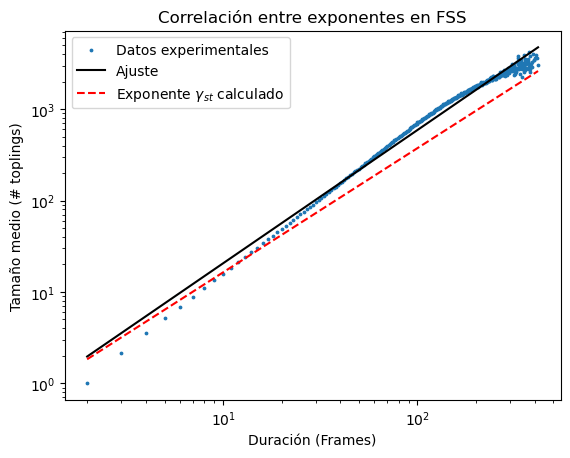

In [60]:
data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_32x32.dat", delimiter=",", dtype=int)
data = data[ data[:,1]>0]

t = np.linspace(1, np.max(data[:,2]), np.max(data[:,2]))

#Hago la media de todos los valores de size encontrados para un cierto valor de t, para todos los valores de t
sum = np.zeros(t.size)
counter = np.zeros(t.size)
meanSizes = np.zeros(t.size)

for i in range(0, data[:,0].size):
    sum[data[i,2]-1] = sum[data[i,2]-1] + data[i,1]
    counter[data[i,2]-1] = counter[data[i,2]-1] + 1

for i in range(0, sum.size):
    if counter[i]>0:
        meanSizes[i] = sum[i]/counter[i]
    else: meanSizes[i] = 0

t = t[ meanSizes[:]>0]
meanSizes = meanSizes[ meanSizes[:]>0]
#DATOS EXPERIMENTALES
plt.scatter(t, meanSizes, s=3, label = "Datos experimentales")

#EXPONENTE CON REGRESIÓN
linRegX = t
linRegData = meanSizes
regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

m = regModel.coef_
n = regModel.intercept_
R2 = regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", m, "±" , lrs.mErr(m, R2, linRegX.size))
print("Ord. origen:", n, "±", lrs.nErr(m, R2, linRegX.size, linRegX))
print("R^2:", R2)

plt.plot(linRegX, np.exp(regModel.intercept_)*linRegX**regModel.coef_,color="black", label="Ajuste")

#LEY DE POTENIAS CON EXPONENTE CALCULADO
plt.plot(linRegX, np.exp(regModel.intercept_)*linRegX**1.36, "--", c="r", label=r"Exponente $\gamma_{st}$ calculado")

plt.xscale("log")
plt.yscale("log")
plt.title("Correlación entre exponentes en FSS")
plt.xlabel("Duración (Frames)")
plt.ylabel("Tamaño medio (# toplings)")

plt.legend()